# 1. 10X10 숫자 패턴그룹 초기화

In [13]:
import numpy as np

num_set = [[[0,0,0,1,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,1,0,0],
            [0,1,1,1,0,0,1,1,1,0],
            [0,1,1,1,0,0,1,1,1,0],
            [0,1,1,1,0,0,1,1,1,0],
            [0,1,1,1,0,0,1,1,1,0],
            [0,1,1,1,0,0,1,1,1,0],
            [0,1,1,1,0,0,1,1,1,0],
            [0,0,1,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,1,0,0,0]], #0
          
           [[0,0,0,1,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0,0],
            [1,1,1,1,1,1,1,0,0,0],
            [0,0,0,1,1,1,1,0,0,0],
            [0,0,0,1,1,1,1,0,0,0],
            [0,0,0,1,1,1,1,0,0,0],
            [0,0,0,1,1,1,1,0,0,0],
            [0,0,0,1,1,1,1,0,0,0],
            [0,0,0,1,1,1,1,0,0,0],
            [1,1,1,1,1,1,1,1,1,1]], #1
          
           [[0,0,0,0,0,0,0,0,0,0],
            [0,1,1,1,1,1,1,1,1,0],
            [0,0,0,0,0,0,0,0,1,1],
            [0,0,0,0,0,0,0,0,1,1],
            [0,0,0,0,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0,0],
            [1,1,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,1]], #2
           
           [[1,1,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1,1],
            [0,0,0,0,0,0,0,0,1,1],
            [0,0,0,0,0,0,0,0,1,1],
            [0,0,1,1,1,1,1,1,0,0],
            [0,0,1,1,1,1,1,1,0,0],
            [0,0,0,0,0,0,0,0,1,1],
            [0,0,0,0,0,0,0,0,1,1],
            [1,1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1,0]]] #3

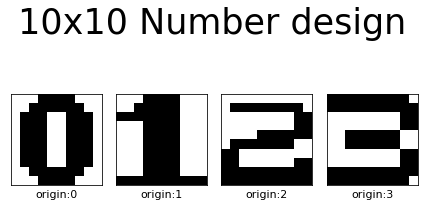

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
w, h = 10, 10

for i,j in zip(num_set, range(1,5)):
    img = Image.fromarray(np.invert(np.array(i).astype(bool)))
    plt.subplot(1,4,j)
    plt.xlabel('origin:'+str(j-1), fontsize=11)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.suptitle('10x10 Number design', fontsize=35)
plt.subplots_adjust(top=0.4)
plt.tight_layout()
plt.savefig('10x10 Number design.png',dpi=300)

# 2. Weight & Theta Matrix generate

In [15]:
def weight_matrix(a):
    n = a.shape[0]
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                W[i][j] = 0
            else:
                W[i][j] = (2*a[i]-1)*(2*a[j]-1).T
    return W
    
def theta_matrix(W):
    n = W.shape[0]
    theta = np.zeros((n,))
    for i in range(n):
        theta[i] = -W[i].sum()/2
    return theta

Weight = np.zeros((100,100))
for i in range(4):
    Weight += weight_matrix(np.ravel(num_set[i]))

theta = theta_matrix(Weight)

print('Weight :\n',Weight)
print('\nTheta :\n',theta)

Weight :
 [[ 0.  4.  4. ...  0.  0. -2.]
 [ 4.  0.  4. ...  0.  0. -2.]
 [ 4.  4.  0. ...  0.  0. -2.]
 ...
 [ 0.  0.  0. ...  0.  4.  2.]
 [ 0.  0.  0. ...  4.  0.  2.]
 [-2. -2. -2. ...  2.  2.  0.]]

Theta :
 [  1.   1.   1. -11. -11. -11. -11.   1.   1.  17.   1.  -1. -13. -13.
 -13. -13. -13. -13.  -1.   1.  17.   5.   5.   5.  17.  17.   5.   5.
 -13.  -1.  17.   5.   5.   5.  17.  17.   5.   5. -13.  -1.  17.   5.
 -11. -11.  -1.  -1. -13. -13.   3.  15.  17.   3. -13. -13.  -1.  -1.
 -13. -13.   5.  17.  15.   3.   5.   5.  17.  17.   5.   5. -11.   1.
  15.   3.   5.   5.  17.  17.   5.   5. -13.  -1.  -1.  -1. -13. -13.
 -13. -13. -13. -13.  -1.  -1.  -1.  -1.  -1. -13. -13. -13. -13.  -1.
  -1.  15.]


# 3. Bit update

In [16]:
def calc_net(w,a,t):
    n = a.shape[0]*a.shape[1]
    update = True
    history_set = []
    history_set.append(np.copy(a))
    j = 1
    while update:
        update = False
        flat_a = np.ravel(a)
        for i in range(n):
            new_u = np.dot(w[i],flat_a)+t[i]
            state = flat_a[i]
            if new_u > 0:
                state =  1
            elif new_u < 0:
                state =  0

            if flat_a[i] != state:
                update = True
                flat_a[i] = state
                
            if not np.array_equal(history_set[-1],np.copy(a)):
                history_set.append(np.copy(a))
        j+=1
    return history_set

# 4. Noise Number Set

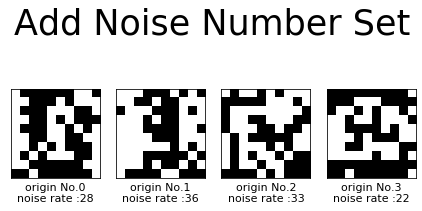

In [17]:
def add_noise(random_noise_min = 20, random_noise_max = 40, noise_seed = 2):
    noise_num_set = np.copy(np.array(num_set))
    noise_rate = np.zeros((4,))
    for i in range(4):
#         np.random.seed(noise_seed)
        random_noise_num = np.random.randint(random_noise_min,random_noise_max,size = 1)
        noise_rate[i] = random_noise_num
        random_noise_w = np.random.randint(w, size=random_noise_num)
        random_noise_h = np.random.randint(h, size=random_noise_num)
        for x,y in zip(random_noise_w, random_noise_h):
            noise_num_set[i][y][x] = not noise_num_set[i][y][x]
    return noise_num_set, noise_rate
            
noise_num_set, noise_rate = add_noise()

for i,j in zip(np.copy(noise_num_set), range(1,5)):
    img = Image.fromarray(np.invert(np.array(i).astype(bool)))
    plt.subplot(1,4,j)
    plt.xlabel('origin No.'+str(j-1)+'\nnoise rate :'+str(int(noise_rate[j-1])), fontsize=11)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.suptitle('Add Noise Number Set', fontsize=35)
plt.subplots_adjust(top=0.4)
plt.tight_layout()
plt.savefig('Add Noise Num Set.png',dpi=300)

In [18]:
def print_num_set(set,iter_num):
    n = len(set)
    plt.figure(figsize = (10,22))
    for i,j in zip(set, range(1,n+1)):
        img = Image.fromarray(np.invert(np.array(i).astype(bool)))
        plt.subplot(n//4 + 1,4,j)
        plt.xlabel('Itration #'+str(j), fontsize=15)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
    plt.suptitle('Hopfield Net, Noise Number #'+str(iter_num), fontsize = 20)
    plt.subplots_adjust(top=0.9,bottom=0.1)
    plt.tight_layout()
    plt.savefig('Hopfield Net, Noise Number #'+str(iter_num)+'.png',dpi=300)

# 5. Noise Data Verification

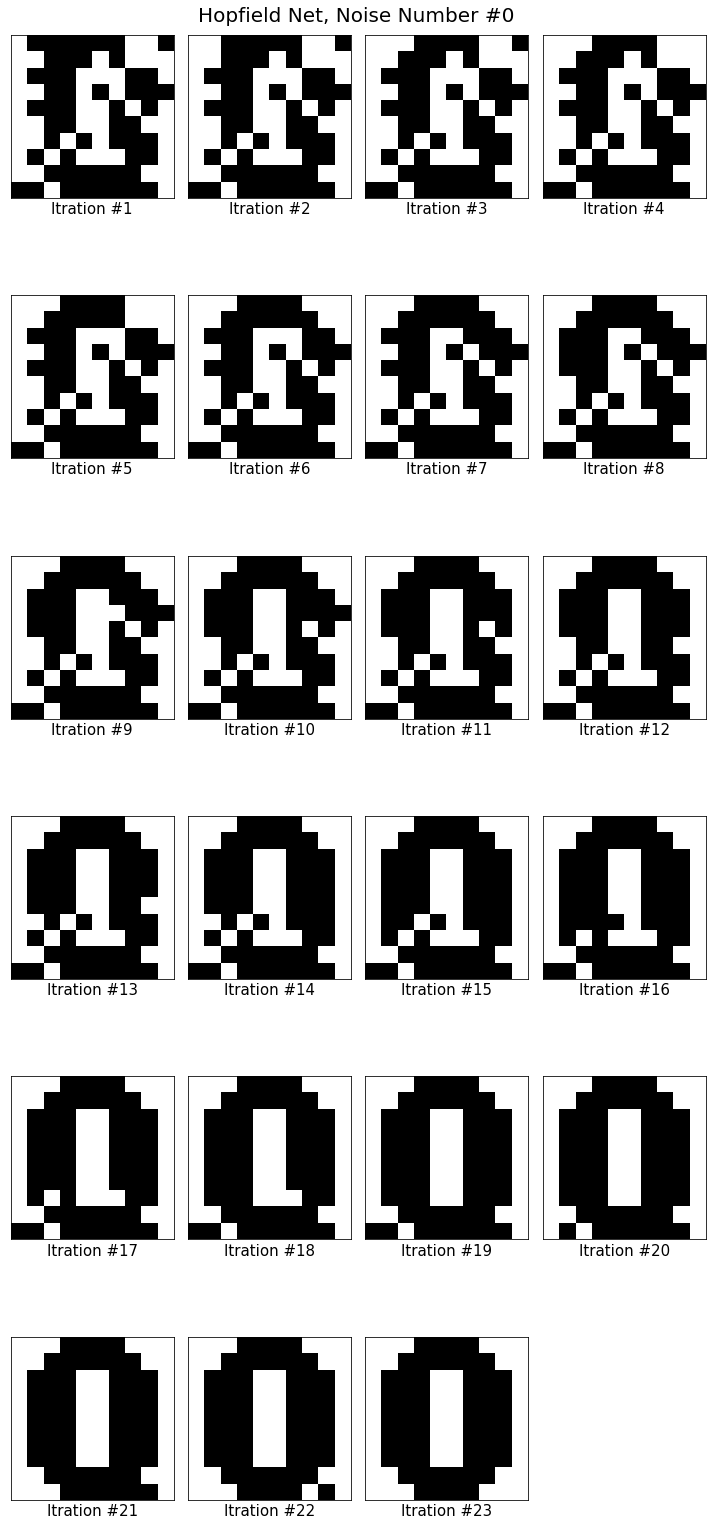

In [19]:
history_num_set = np.copy(calc_net(Weight,np.copy(noise_num_set[0]),theta))
print_num_set(history_num_set,0)

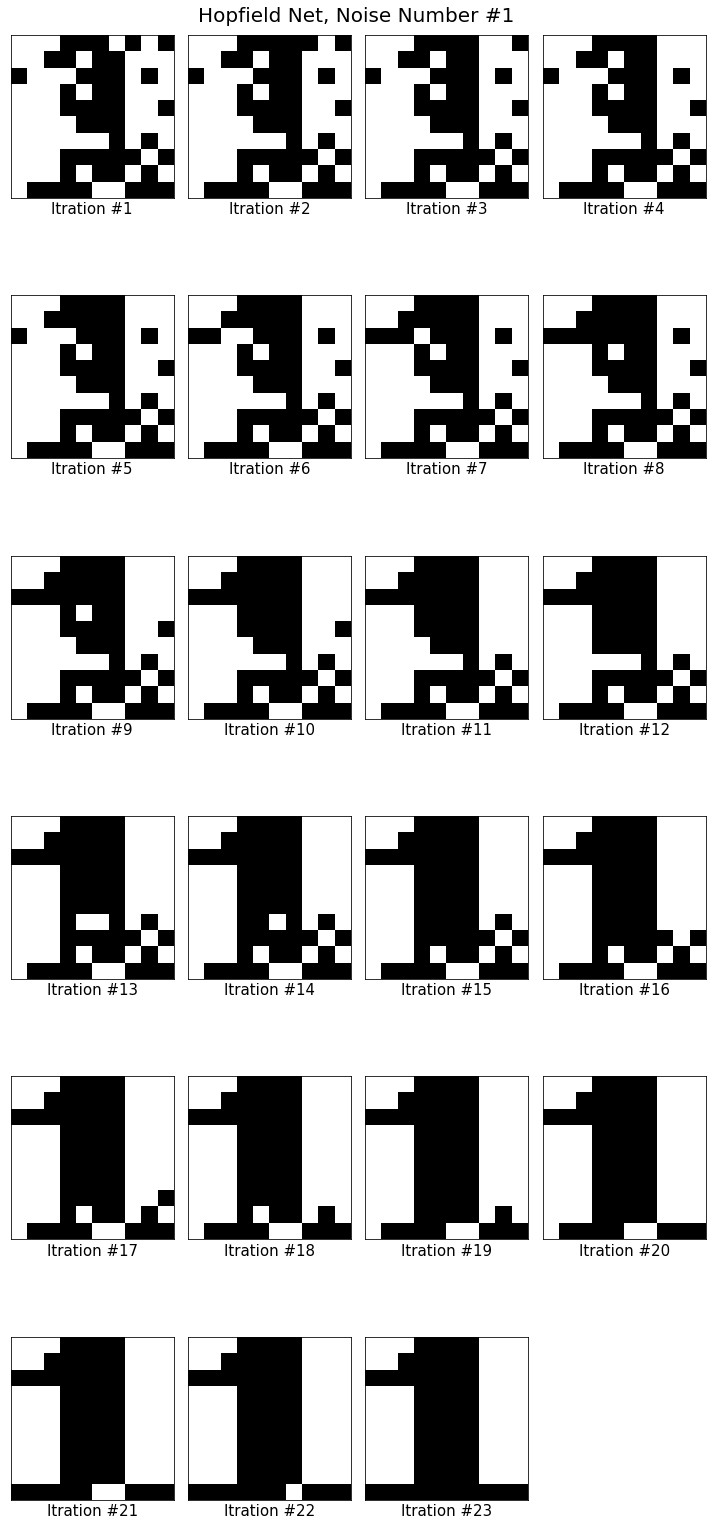

In [20]:
history_num_set = np.copy(calc_net(Weight,np.copy(noise_num_set[1]),theta))
print_num_set(history_num_set,1)

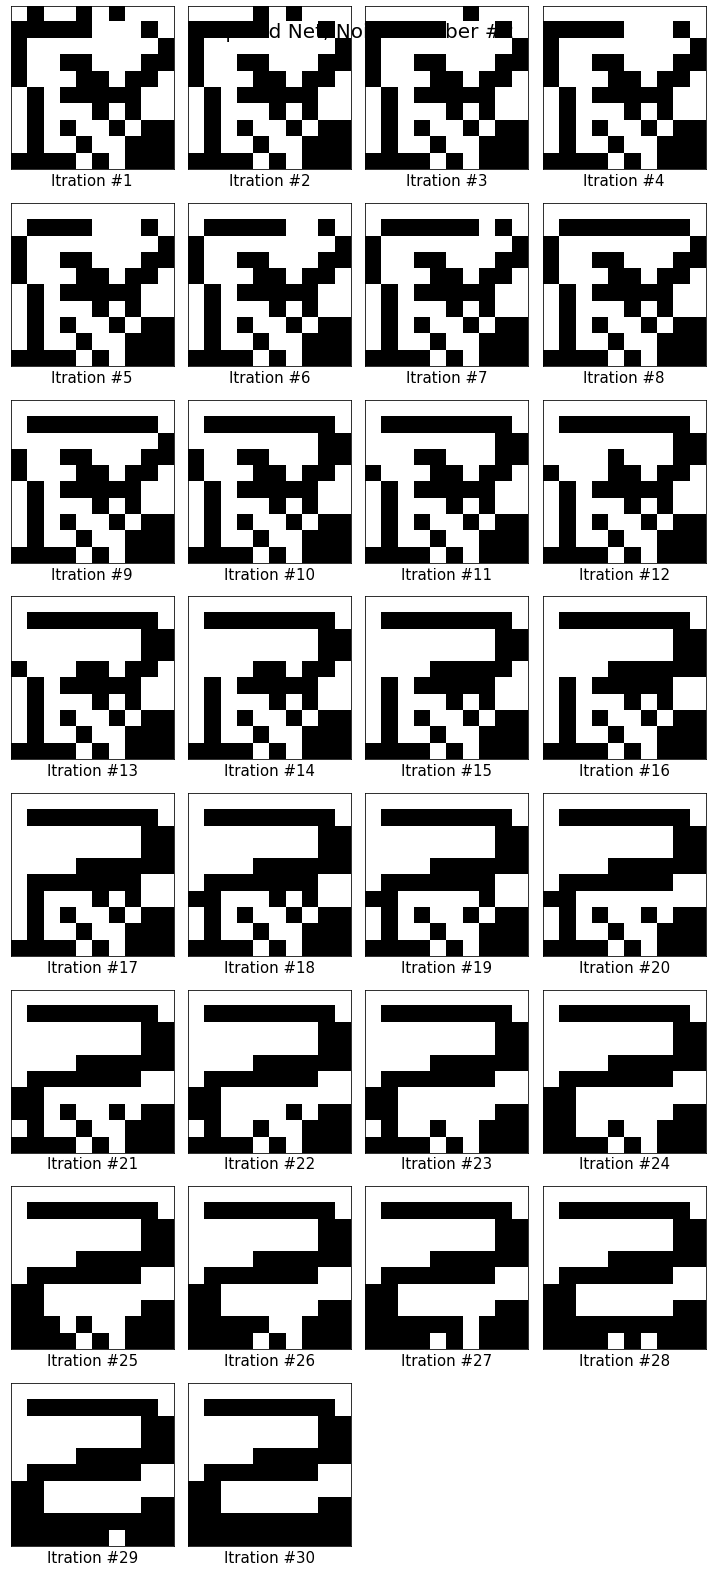

In [21]:
history_num_set = np.copy(calc_net(Weight,np.copy(noise_num_set[2]),theta))
print_num_set(history_num_set,2)

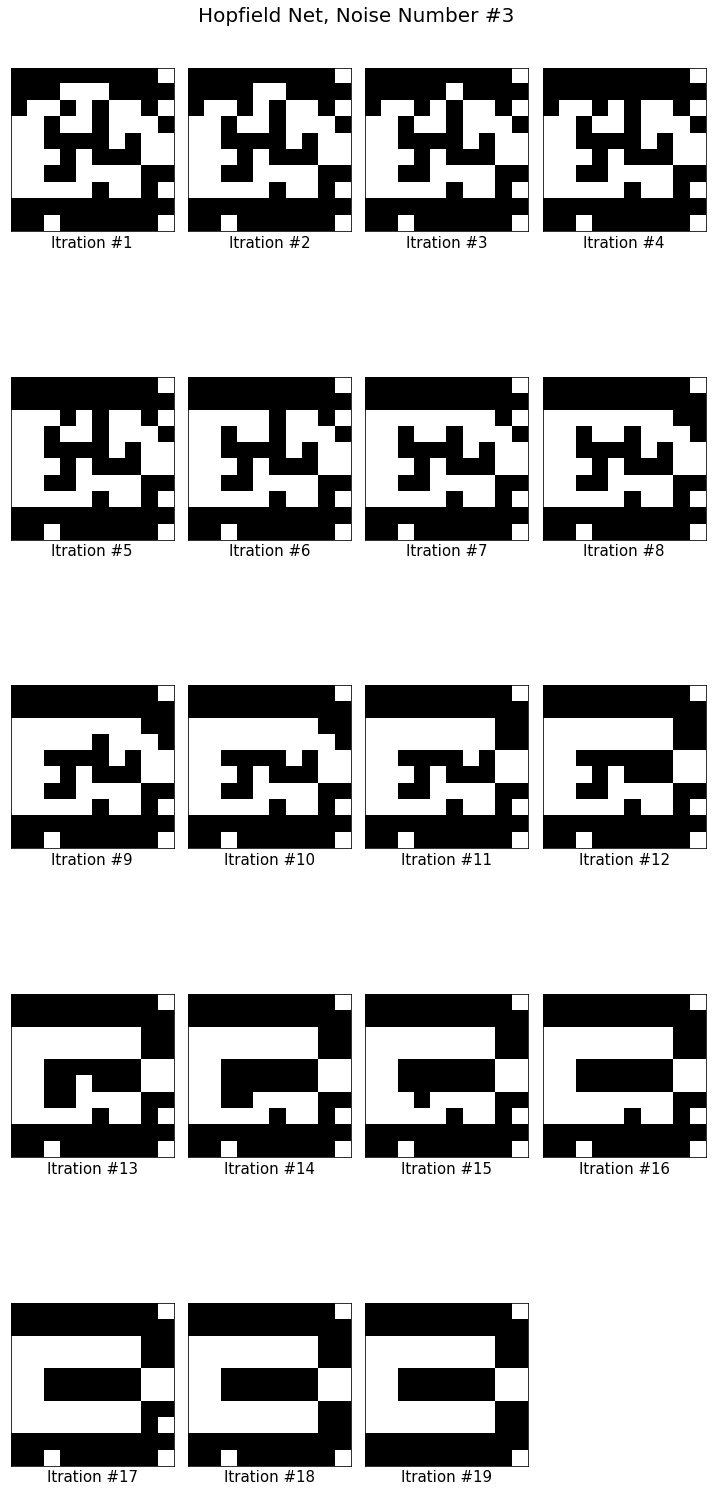

In [22]:
history_num_set = np.copy(calc_net(Weight,np.copy(noise_num_set[3]),theta))
print_num_set(history_num_set,3)

# 6. 최대 잡음 적응성 검증하기

In [23]:
noise_ratio = [i for i in range(10,71)]
adaptability_rate = [[] for _ in range(4)]

for i in noise_ratio:
    temp_accuracy = [0,0,0,0]
    for j in range(100):
        test_noise_num_set, test_noise_rate = add_noise(i,i+1,j)
        for k in range(4):
            test_history_num_set = np.copy(calc_net(Weight,np.copy(test_noise_num_set[k]),theta))
            if np.array_equal(test_history_num_set[-1],np.array(num_set[k])):
                temp_accuracy[k] += 1
    for j in range(4):
        adaptability_rate[j].append(temp_accuracy[j])
                
print(adaptability_rate)

[[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 99, 100, 100, 99, 100, 99, 96, 97, 98, 98, 98, 96, 95, 96, 91, 93, 89, 92, 94, 93, 95, 83, 86, 84, 89, 88, 87, 84, 80, 82, 78, 77, 77, 74, 77, 74, 77, 74, 74, 66], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 99, 98, 98, 100, 99, 96, 97, 95, 97, 98, 99, 97, 94, 96, 96, 88, 92, 91, 90, 89, 88, 85, 85, 88, 77, 75, 80, 76, 74, 75, 80, 72, 68, 75, 72, 75, 67, 69, 68, 59, 51, 54, 52], [100, 99, 100, 100, 100, 99, 98, 99, 99, 97, 97, 97, 91, 95, 94, 94, 93, 94, 91, 89, 96, 78, 85, 84, 85, 85, 78, 84, 81, 69, 87, 76, 73, 73, 75, 79, 73, 71, 61, 65, 66, 74, 60, 61, 55, 60, 58, 62, 60, 58, 48, 64, 50, 58, 51, 54, 50, 52, 46, 46, 43], [100, 100, 100, 99, 100, 96, 100, 98, 99, 97, 94, 95, 99, 94, 94, 93, 91, 92, 90, 88, 84, 81, 77, 93, 80, 82, 77, 76, 83, 79, 82, 75, 78, 71, 79, 74, 74, 69, 70, 74, 64, 56, 66, 62, 54, 71, 59, 61, 53, 53, 58, 68, 62

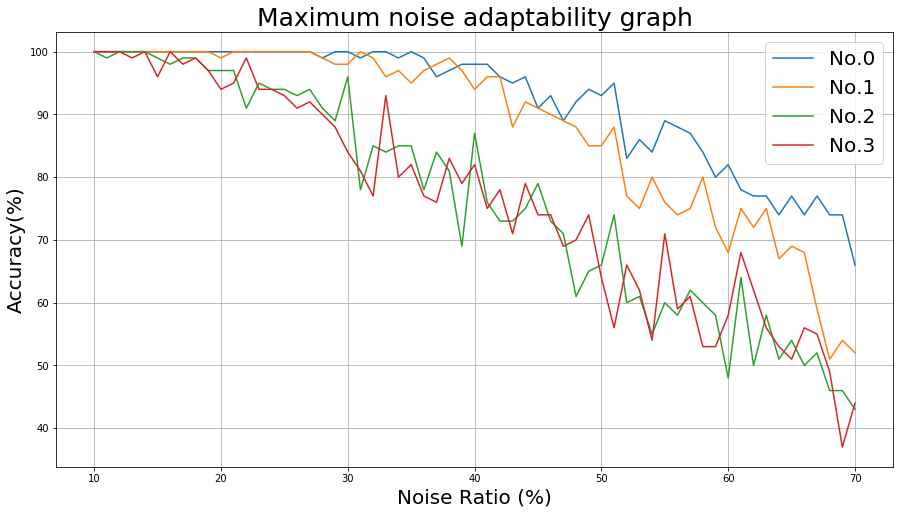

In [24]:
plt.figure(figsize=(15,8))
for i in range(4):
    plt.plot(noise_ratio,adaptability_rate[i],label='No.%d' % int(i))

plt.title('Maximum noise adaptability graph',fontsize=25)
plt.ylabel('Accuracy(%)',fontsize=20)
plt.xlabel('Noise Ratio (%)',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.savefig('Maximum noise adaptability graph.png',dpi=300)
plt.show()